In [ ]:
using PyCall
using PyPlot
using DataFrames

In [ ]:
# To read the activity data use the following function
function readActivity(dataFileName::String)
    dfData = readtable(dataFileName; header = true, skipstart=1)
    return dfData
end

In [ ]:
myDir = "/home/faragegr/Project/SmartBandActivity2018/develop/data/32 Week Gestation Data/"
myFiles = readdir(myDir);

dfD = readActivity(myDir*myFiles[1]);

dfD[:DateTime]=DateTime(dfD[:DateTime])

myStartTime = dfD[1,3];
myFinishTime = dfD[end,3];

totalWearTime = convert(Float64,Dates.value(Dates.Second((myFinishTime-myStartTime)))); #in seconds
completeNumDays = Int(floor(totalWearTime/86400));

In [ ]:
matActivity = reshape(dfD[1:completeNumDays*1440, 4], 1440, completeNumDays); # 1440 min in 24 hours
matActivity = matActivity[:, :];

avAct = mean(matActivity, 2);

In [ ]:
figure()
p1 = plot(1:1440,avAct)
ylabel("Activity Counts")
title("Average Activity over 24 hours")
grid("on")

In [29]:
dtS =Dates.format(dfD[1:1440,3], "HH:MM")

1440-element Array{String,1}:
 "13:27"
 "13:28"
 "13:29"
 "13:30"
 "13:31"
 "13:32"
 "13:33"
 "13:34"
 "13:35"
 "13:36"
 "13:37"
 "13:38"
 "13:39"
 ⋮      
 "13:15"
 "13:16"
 "13:17"
 "13:18"
 "13:19"
 "13:20"
 "13:21"
 "13:22"
 "13:23"
 "13:24"
 "13:25"
 "13:26"

In [30]:
# Sort the time vector
idx = sortperm(dtS)

1440-element Array{Int64,1}:
 634
 635
 636
 637
 638
 639
 640
 641
 642
 643
 644
 645
 646
   ⋮
 622
 623
 624
 625
 626
 627
 628
 629
 630
 631
 632
 633

In [23]:
startTime = DateTime("2018-04-27T00:00:00", "yyyy-mm-ddTHH:MM:SS")
dtX = collect(startTime:Dates.Minute(1):DateTime(startTime+Dates.Day(1)-Dates.Minute(1)));

In [26]:
avAct = avAct[idx];

In [25]:
majorformatter = matplotlib[:dates][:DateFormatter]("%H")#("%H:%M")#("%d.%m.%Y")
minorformatter = matplotlib[:dates][:DateFormatter]("%H")
majorlocator = matplotlib[:dates][:HourLocator](byhour=(6,12,18,0))#(interval=1)
minorlocator = matplotlib[:dates][:HourLocator](byhour=(2,4,8,10,14,16,20,22))

PyObject <matplotlib.dates.HourLocator object at 0x7f7569065a90>

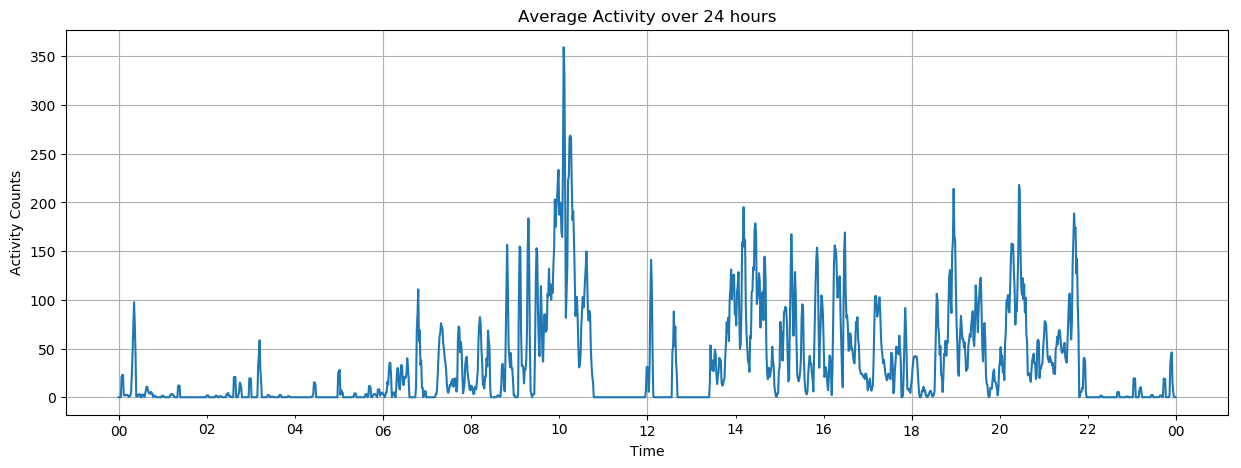

In [28]:
fig = figure("Average Activity",figsize=(15,5))
ax1 = axes()
p1 = plot_date(dtX,avAct, linestyle="-",marker="None")
ylabel("Activity Counts")
xlabel("Time")
title("Average Activity over 24 hours")
axis("tight")
ax1[:xaxis][:set_major_formatter](majorformatter)
ax1[:xaxis][:set_minor_formatter](minorformatter)
ax1[:xaxis][:set_major_locator](majorlocator)
ax1[:xaxis][:set_minor_locator](minorlocator)
grid("on")
#fig[:autofmt_xdate](bottom=0.1,rotation=30,ha="right")
fig[:canvas][:draw]()

In [ ]:
fig = figure("Average Activity",figsize=(15,5))
ax1 = axes()
p1 = plot_date(1:1440,dt, linestyle="-",marker="None")
ylabel("Activity Counts")
xlabel("Time")
title("Average Activity over 24 hours")
axis("tight")

In [ ]:
dtp = [dt[1],dt[1+144],dt[1+144*2], dt[1+144*3], dt[1+144*4], dt[1+144*5], dt[1+144*6],dt[1+144*7]]

In [ ]:
idx = sortperm(Dates.format(dtp, "HH:MM") )

In [ ]:
dtp = dtp[idx]

In [ ]:
plotAverageDay(df, df_hdr)

In [17]:
showcols(dfD)

14554×7 DataFrames.DataFrame
│ Col # │ Name              │ Eltype   │ Missing │
├───────┼───────────────────┼──────────┼─────────┤
│ 1     │ Day               │ Float64  │ 0       │
│ 2     │ ElapsedSeconds    │ Float64  │ 0       │
│ 3     │ DateTime          │ DateTime │ 0       │
│ 4     │ ActivityCounts    │ Float64  │ 0       │
│ 5     │ Steps             │ Int64    │ 0       │
│ 6     │ EnergyExpenditure │ Float64  │ 0       │
│ 7     │ ActivityIntensity │ Float64  │ 0       │

In [ ]:
;cd /home/faragegr/Project/SmartBandActivity2018/develop/data 

In [ ]:
myDir = pwd()*"/32 Week Gestation Data/"

In [ ]:
myFiles = readdir(myDir);

In [ ]:
df = readtable(myDir*myFiles[1]; header = true, skipstart=1);

In [ ]:
df[:DateTime]=DateTime(df[:DateTime]);showcols(df)

In [ ]:
df_hdr = readtable(myDir*myFiles[2]; header = true, skipstart=1);

In [ ]:
ts = df[1,3] 
tf = df[1000,3]

In [ ]:
convert(Dates.Day,Dates.Period(df[1441,3]-df[1,3]))

In [ ]:
totalTime = Dates.Day(df[1000,3])-Dates.Day(df[1,3])

In [ ]:
totalTime = convert(Float64,Dates.value(Dates.Second((tf-ts))))

In [ ]:
floor(totalTime/cstDay)

In [ ]:
reshape(1:18,3,6)

In [ ]:
24*60*60

In [ ]:
df[2880,3]

In [ ]:
aa = [1 2 3;12 7 5]

In [ ]:
mean(aa,1)

In [ ]:
aa = reshape(df[1:10*1440,3], 1440,10);

In [ ]:
aa= aa[:,:];typeof(aa)

In [ ]:
# To plot average activity over 24 hours
function plotAverageDay(dfD::DataFrames.DataFrame, dfH::DataFrames.DataFrame)
    myStartTime = dfD[1,3];
    myFinishTime = dfD[end,3];
    
    totalWearTime = convert(Float64,Dates.value(Dates.Second((myFinishTime-myStartTime)))); #in seconds
    completeNumDays = Int(floor(totalWearTime/86400));
    
    matActivity = reshape(df[1:IntcompleteNumDays*1440, 4], 1440, completeNumDays); # 1440 min in 24 hours
    matActivity = matActivity[:, :];
    
    avAct = mean(matActivity, 2);
    
    figure()
    p1 = plot(1:1440,avAct)
    title("Average Activity over 24 hours")
    grid("on")

end